In [1]:
from pydlr import dlr
import matplotlib.pyplot as plt
import numpy as np
from functions import *

In [2]:
U=2
E_max, beta = 10., 20.
eps = 1e-10
delta_range = (0, 1)
n_dlr = 3
d = multiple_DLR(n_dlr=n_dlr, beta=beta, E_max=E_max, eps=eps, delta_range=delta_range)
print(d.r_list)

[31, 31, 31]


In [3]:
G_0_list = [] # list in DLR points
for w in d.iw_q_list:
    G_0_list.append(get_G_iw(w, a=2))
ac_list = d.get_ac_list(G_0_list)

In [4]:
iw = matsubara("F", np.arange(-20, 20), beta)
omega = np.linspace(-4, 4, 200)
G_0_iw = get_G_iw(iw*1j, a=2) # GF in iw matsubara points to plot at the end

GF2 procedure:
1) Create $G_0$ in DLR points as first G and to use it in Dyson
2) Find ac poles for $G_0$
3) Calculate $\Sigma_{DLR}$ 
4) Find $G$ next step using Dyson $G = (G_0^{-1} - \Sigma)^{-1}$ 
5) Find ac poles for next step $G$
6) Use this G to calculate $\Sigma$ next step
7) Repeat steps 3, 4, 5 till SE or G self consist

In [5]:
SE = SelfEnergy(beta=beta)
se_steps = []
gf_steps = []
gf_steps.append(G_0_iw)

In [6]:
i = 0
toll = 1.e-9
for _ in range(100):
    se_list = []
    for w in d.iw_q_list:
        se = SE.get_self_energy_from_poles(ac_list, w, U=U)
        se_list.append(se)
        
    se_iw = SE.get_self_energy_from_poles(ac_list, iw*1j, U=U) # to plot
    se_steps.append(se_iw)
    
    # find G
    G_list = []
    for w, G_0, se in zip(d.iw_q_list, G_0_list, se_list):
        GF = dyson(G_0, se)
        G_list.append(GF)
    ac_list = d.get_ac_list(G_list)
    
    G_iw = dyson(G_0_iw, se_iw) # to plot
    gf_steps.append(G_iw)
    i += 1        
    
    if i > 1 and np.mean(np.abs(se_steps[-1].imag - se_steps[-2].imag)) < toll:
        break
print(f"Number of steps: {i}")

Number of steps: 13


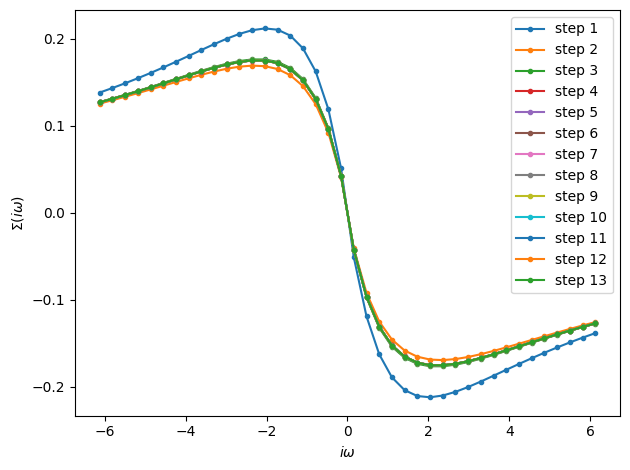

In [7]:
plt.show()
fig = plt.figure()
for i, se in enumerate(se_steps):
    plt.plot(iw, np.imag(se), marker=".", label=f"step {i+1}")
plt.ylabel(r"$\Sigma(i\omega)$")
plt.xlabel(r"$i\omega$")
plt.legend()
plt.tight_layout()
plt.show()

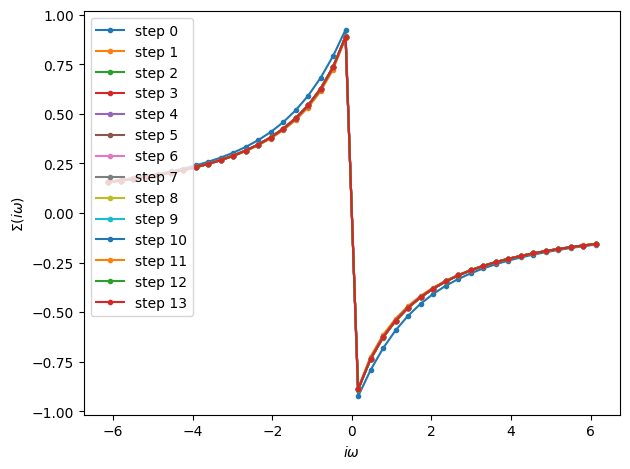

In [8]:
plt.show()
fig = plt.figure()
for i, gf in enumerate(gf_steps):
    plt.plot(iw, np.imag(gf), marker=".", label=f"step {i}")
plt.ylabel(r"$\Sigma(i\omega)$")
plt.xlabel(r"$i\omega$")
plt.legend(loc=2)
plt.tight_layout()
plt.show()